In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

Sample happy image:


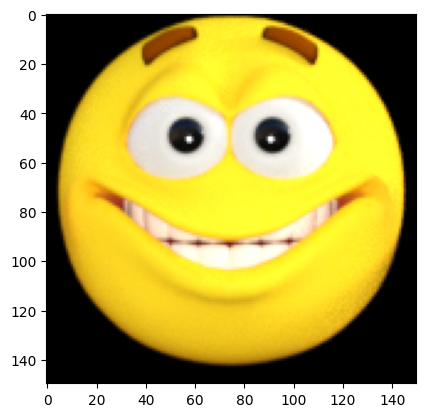


Sample sad image:


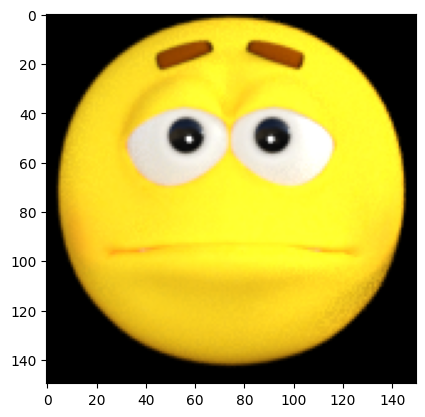

In [ ]:
#load data

from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [ ]:
#callback class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():

    train_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory(directory="./data/",
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    return train_generator

In [ ]:
# Save your generator in a variable
gen = image_generator()

Found 80 images belonging to 3 classes.


In [ ]:
#build the model

from tensorflow.keras import optimizers, losses
from tensorflow.keras.optimizers import RMSprop
def train_happy_sad_model(train_generator):
    callbacks = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])


    # Train the model
    history = model.fit(x=train_generator,
                        epochs=15,
                        callbacks=[callbacks]
                       )

    return history

In [ ]:
hist = train_happy_sad_model(gen)

Epoch 1/15
8/8 [==============================] - 2s 207ms/step - loss: -1217.0463 - accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 2s 228ms/step - loss: -76049.5156 - accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 2s 270ms/step - loss: -435573.4375 - accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 2s 201ms/step - loss: -1452513.1250 - accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 2s 200ms/step - loss: -3560843.5000 - accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 2s 202ms/step - loss: -7395087.0000 - accuracy: 0.5000
Epoch 7/15
8/8 [==============================] - 2s 204ms/step - loss: -13570925.0000 - accuracy: 0.5000
Epoch 8/15
8/8 [==============================] - 2s 204ms/step - loss: -22500336.0000 - accuracy: 0.5000
Epoch 9/15
8/8 [==============================] - 2s 202ms/step - loss: -34825684.0000 - accuracy: 0.5000
Epoch 10/15
8/8 [==============================] - 2s 202m

In [ ]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 15 epochs


In [ ]:
if not "accuracy" in hist.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

The metric was correctly defined.
